# Piecewise polynomial (spline) approximation module _tfspline_
## Demo: Basics - Fit spline to data and visualize results

Version 1.0
Date: 2022-06-09
Contact: hannes.waclawek@fh-salzburg.ac.at

In [17]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tfspline import model, plot, sampledata

In [18]:
# Spline config
n_segments = 4
degree = 5
ck = 2

In [19]:
# Optimization config
learning_rate = 0.1
epochs = 500
lambd = 0.5
gradient_regularization=True

## Generate input data and rescale axes
The input space needs to be rescaled such that every polynomial segment is in the range `[0, 1]`.
This allows for same optimization conditions for all segments. See paper for details.

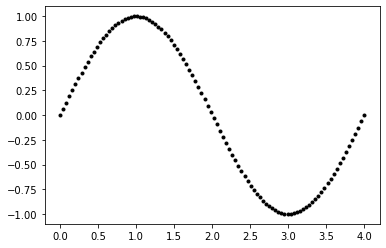

In [20]:
[data_x, data_y] = sampledata.generate_sample_data_sin(n=100, f=1, noise_factor=0)
data_x = sampledata.rescale_input_data(data_x, n_segments)

# Plot data
plt.plot(data_x, data_y, 'k.')

## Create spline and configure output parameters

In [21]:
spline = model.Spline(polydegree=degree, polynum=n_segments, ck=ck)

## Fit spline to data
and plot result.

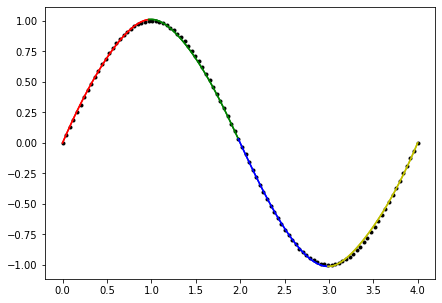

In [22]:
opt_sgd = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.95, nesterov=True)

spline.fit(data_x, data_y, optimizer=opt_sgd, n_epochs=epochs, factor_approximation_quality=lambd,
factor_ck_pressure=1-lambd)

plot.plot_spline(spline)

## Plot derivatives

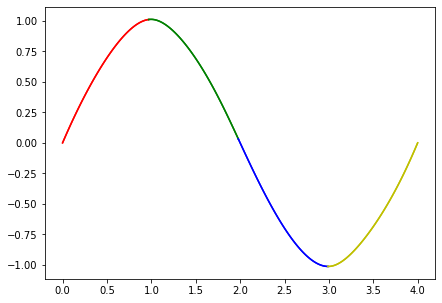

In [23]:
plot.plot_spline(spline, plot_input=False, deriv=0)

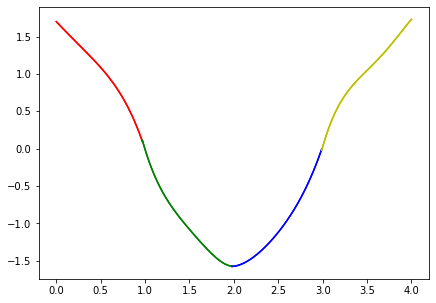

In [24]:
plot.plot_spline(spline, plot_input=False, deriv=1)

## Evaluate spline at given x-position(s)

and plot results using matplotlib

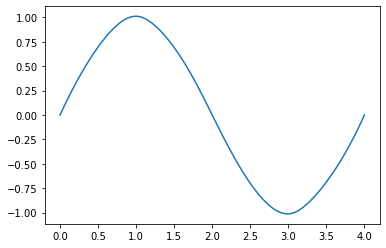

In [25]:
y = spline.evaluate_spline_at_x(data_x,deriv=0)
plt.plot(data_x,y)

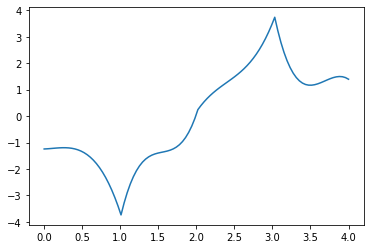

In [26]:
y = spline.evaluate_spline_at_x(data_x,deriv=2)
plt.plot(data_x,y)

In [27]:
x = np.float64(0.0)
y = spline.evaluate_spline_at_x(x,deriv=0)
y

<tf.Tensor: shape=(), dtype=float64, numpy=-1.1102230246251565e-16>

## Plot Loss

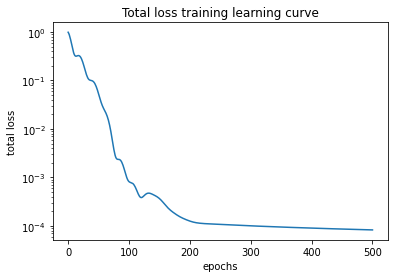

In [28]:
plot.plot_loss(spline, 'total')

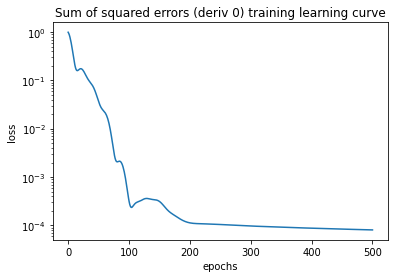

In [29]:
plot.plot_loss(spline, 'approx')

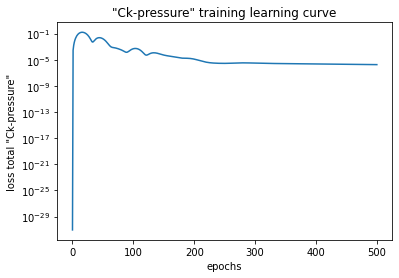

In [30]:
plot.plot_loss(spline, 'ck-D')

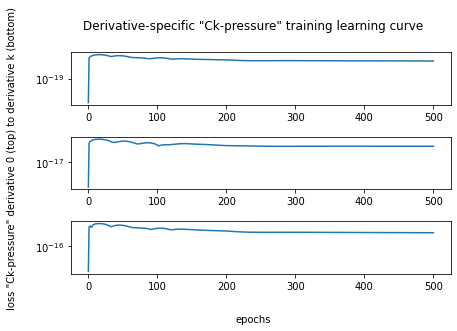

In [31]:
plot.plot_loss(spline, 'ck-d')

## Initialize with l2 fit

Segments can be initialized using an l2 fit to improve result.
Segments are being overlapped and "cut off" at boundary points in order to better align adjacent polynomial pieces.

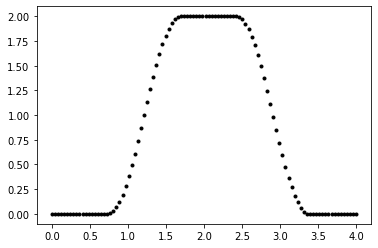

In [33]:
[data_x, data_y] = sampledata.generate_sample_data_cam_table(n=100, noise_factor=0)
data_x = sampledata.rescale_input_data(data_x, n_segments)

# Plot data
plt.plot(data_x, data_y, 'k.')

Without l2 fit initialization:

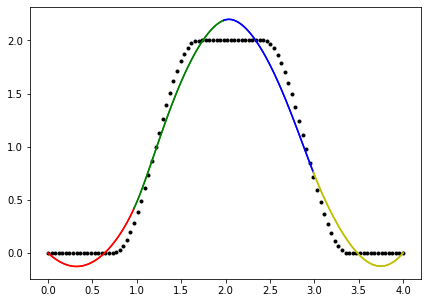

In [34]:
spline = model.Spline(polydegree=degree, polynum=n_segments, ck=ck)
opt_sgd = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.95, nesterov=True)

spline.fit(data_x, data_y, optimizer=opt_sgd, n_epochs=epochs, factor_approximation_quality=lambd,
factor_ck_pressure=1-lambd, initialize_l2fit=False, overlap_segments=0.4)

plot.plot_spline(spline)

With l2 fit initialization:

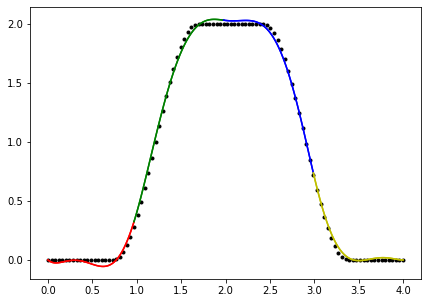

In [35]:
spline = model.Spline(polydegree=degree, polynum=n_segments, ck=ck)
opt_sgd = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.95, nesterov=True)

spline.fit(data_x, data_y, optimizer=opt_sgd, n_epochs=epochs, factor_approximation_quality=lambd,
factor_ck_pressure=1-lambd, initialize_l2fit=True, overlap_segments=0.4)

plot.plot_spline(spline)